<a href="https://colab.research.google.com/github/mdmarghe/DeepLearning/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATI
  

##Dataset


In [40]:
from keras.datasets import reuters

In [41]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [42]:
len(train_data)


8982

In [43]:
len(test_data)

2246

In [44]:
train_data[10] #le parole piu importanti fra le 10000 presenti nel 10imo articolo del ds

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [45]:
#decidoficare i dati
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])

In [46]:
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Gli articoli da classificare sono mono etichetta e le etichette sono 46 in totale

##Preparazione dati

In [47]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results

In [48]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [49]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Dobbiamo vettorizzare anche le labels: possiamo farlo tramite hotencoding


In [50]:
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1
  return results

In [51]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [52]:
one_hot_train_labels[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Possiamo vettorizzare le etichette tramite categorizzazione fornita da keras (come per MNIST)

In [53]:
from keras.utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

#Creazione della rete

In [54]:
from keras import layers, models

In [55]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##Convalida approccio

In [57]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

##Addestramento modello

In [58]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4088 - loss: 3.0398 - val_accuracy: 0.6220 - val_loss: 1.6914
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6760 - loss: 1.5292 - val_accuracy: 0.6970 - val_loss: 1.3655
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7444 - loss: 1.1744 - val_accuracy: 0.7310 - val_loss: 1.1975
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7909 - loss: 0.9883 - val_accuracy: 0.7640 - val_loss: 1.0862
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8231 - loss: 0.8418 - val_accuracy: 0.7880 - val_loss: 1.0201
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.8586 - loss: 0.6666 - val_accuracy: 0.8080 - val_loss: 0.9575
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8811 - loss: 0.5587 - val_accuracy: 0.8060 - val_loss: 0.9147
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8960 - loss: 0.4802 - val_accuracy: 0.8120 - 

##Tracciamento del valore di loss e accuracy


In [59]:
import matplotlib.pyplot as plt

In [60]:
loss=history.history['loss']
val_loss=history.history['val_loss']

In [61]:
epochs=range(1, len(loss)+1)

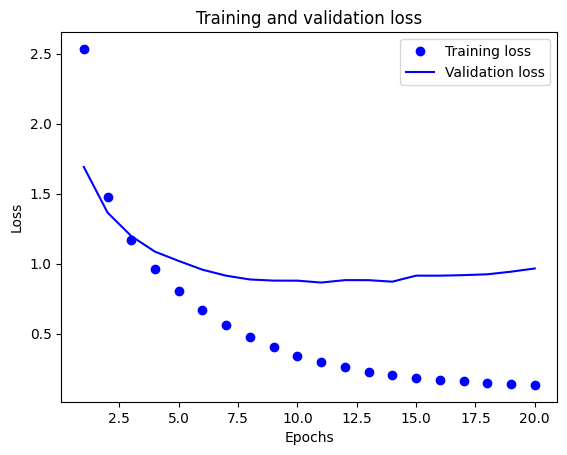

In [62]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


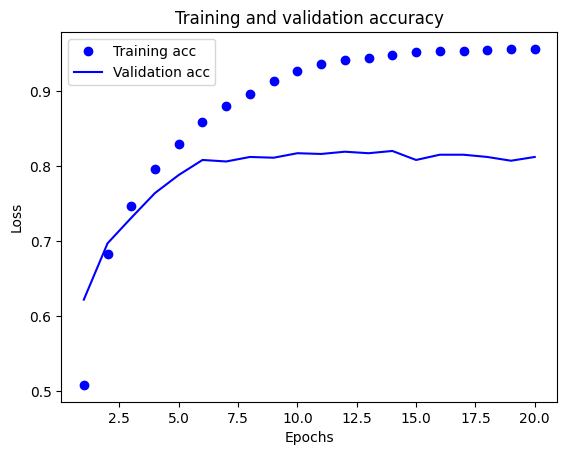

In [63]:
plt.clf()                                                #1

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#1 - Clears the figure


##Retrain post convalida

In [64]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [65]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4182 - loss: 3.1672 - val_accuracy: 0.6340 - val_loss: 1.7462
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6742 - loss: 1.5594 - val_accuracy: 0.7050 - val_loss: 1.3570
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7410 - loss: 1.2193 - val_accuracy: 0.7430 - val_loss: 1.1906
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8066 - loss: 0.9439 - val_accuracy: 0.7680 - val_loss: 1.0973
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8267 - loss: 0.8119 - val_accuracy: 0.7790 - val_loss: 1.0313
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8558 - loss: 0.6722 - val_accuracy: 0.8070 - val_loss: 0.9609
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8880 - loss: 0.5423 - val_accuracy: 0.7990 - val_loss: 0.9338
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9060 - loss: 0.4650 - val_accuracy: 0.8170 - val_loss:

In [67]:
results=model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.9408


[0.954763650894165, 0.7849510312080383]

Paragoniamo il risultato con un approccio di classificazione puramente casuale

In [68]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.1834372217275156

##Generare predizioni su nuovi dati

In [69]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
predictions[0].shape

(46,)

In [71]:
np.sum(predictions[0])

np.float32(0.99999994)

Siccome la classe calcolata corrisponde alla label con la probabilità più alta

In [72]:
np.argmax(predictions[0])

np.int64(3)

#UN MODO DIFFERENTE DI GESTIRE LE ETICHETTE E IL VALORE DI LOSS

In [76]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

Nell'esempio precedente abbiamo potuto utilizzare la funzione obiettivo 'categorical crossentropy' perchè le etichette seguivano una codifica CATEGORICA.
Con delle etichette INTERE utilizziamo la stessa entropia ma "Sparse":

In [77]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9097 - loss: 0.4205
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9311 - loss: 0.3151
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9408 - loss: 0.2703
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9478 - loss: 0.2366
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9473 - loss: 0.2174
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9499 - loss: 0.1968
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9536 - loss: 0.1787
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9556 - loss: 0.1661
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9552 - loss: 0.1504


In [90]:
results=model.evaluate(x_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.9874


[0.9932513236999512, 0.7911843061447144]

In [80]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


#L'importanza di avere un numero giusto di layers affinche non si crei un collo di bottiglia

In [91]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2546 - loss: 3.4414 - val_accuracy: 0.4080 - val_loss: 2.5925
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4202 - loss: 2.4024 - val_accuracy: 0.4360 - val_loss: 2.1119
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4521 - loss: 1.9339 - val_accuracy: 0.4420 - val_loss: 1.8211
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4734 - loss: 1.6076 - val_accuracy: 0.6260 - val_loss: 1.5512
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6402 - loss: 1.3560 - val_accuracy: 0.6340 - val_loss: 1.4526
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6590 - loss: 1.2030 - val_accuracy: 0.6320 - val_loss: 1.4293
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6707 - loss: 1.1180 - val_accuracy: 0.6360 - val_loss: 1.4233
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6859 - loss: 1.0670 - val_accuracy: 0.6570 - v